# Offset distribution analysis

## Libraries and Paths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
print('Current directory: %s' %os.getcwd())

Current directory: /home/pw/Projects/mfstocks/code_and_data/prep_and_cleaning


## Read data

In [3]:
df = pd.read_csv("offset_coding.csv", na_values="NaN")

In [4]:
round(df.describe(),2)

,offset_min
count,727.00
mean,-2536.08
std,62462.68
min,-1672242.00
25%,-99.00
50%,-48.00
75%,-28.50
max,23800.00


## Remove problematic sources

In [5]:
def RemoveSources(data, listofsources):
    dfs = []
    for source in listofsources:
        unwanted = data[data.source_x == source]
        dfs.append(unwanted)
    remove = pd.concat(dfs)
    keep = data[~data.url.isin(remove.url)]

    return remove, keep

ls=["forbes.com","chron.com","sfgate.com","nytimes.com","reuters.com","zerohedge.com","nbcnews.com","foxbusiness.com","fastcompany.com","chicagotribune.com",
      "businessinsider.com","breitbart.com","foxnews.com","adweek.com","cnn.com","investors.com","nbcnews.com"]
remove, keep = RemoveSources(df, ls)

In [6]:
round(keep.describe(),2)

,offset_min
count,632.00
mean,-271.82
std,8001.40
min,-197647.00
25%,-103.00
50%,-48.00
75%,-29.00
max,23800.00


Examine boxplot for offset distributions across news sources prior to outlier removal

(-500.0, 300.0)

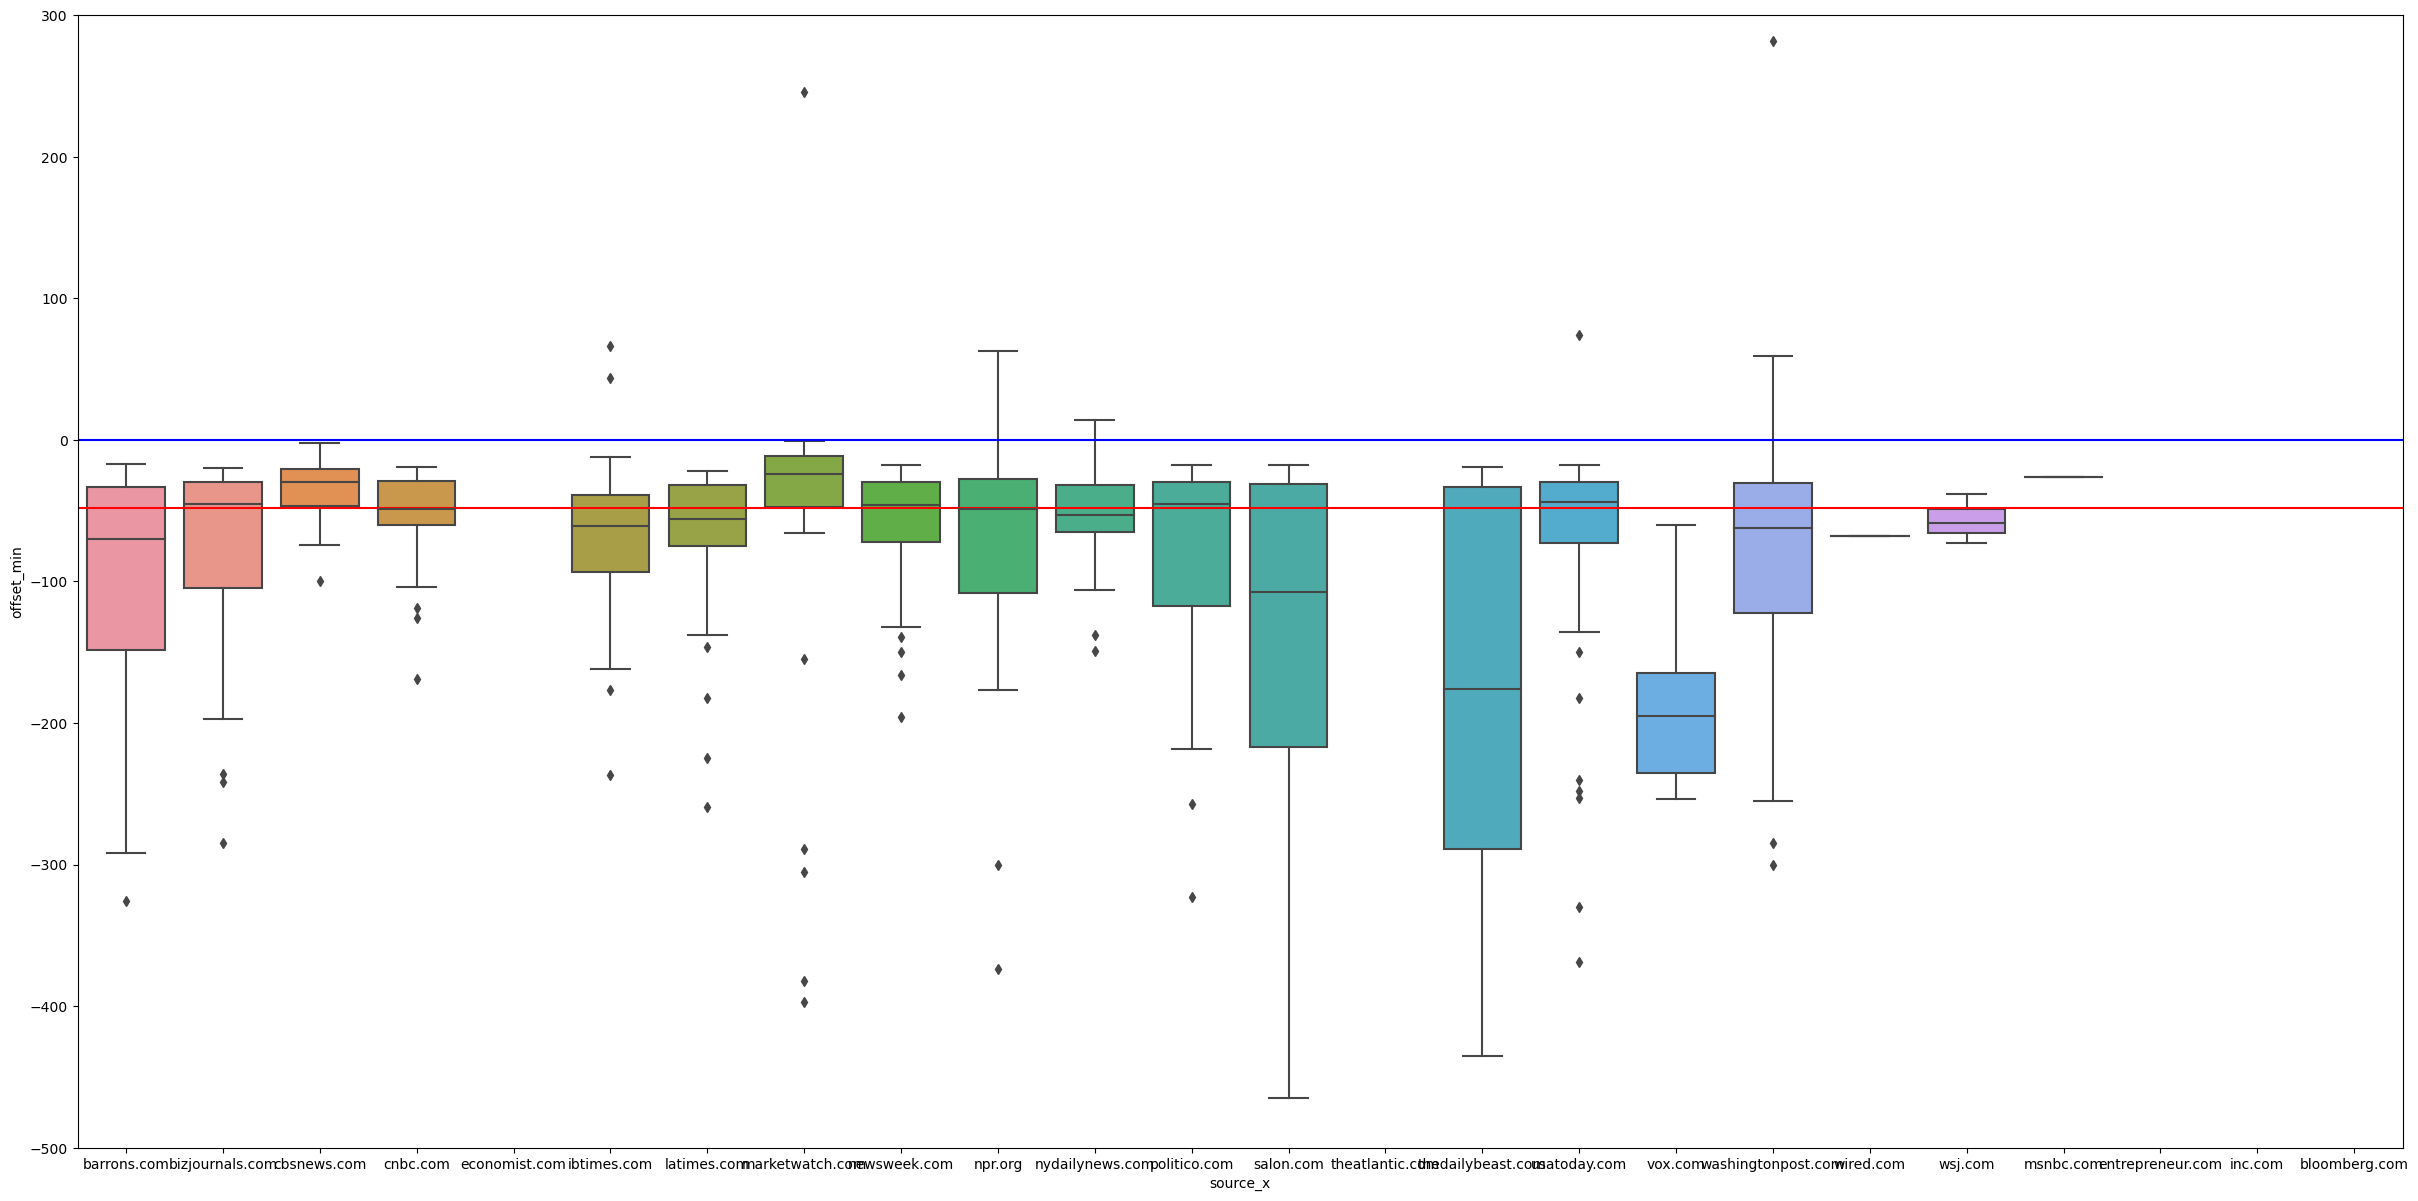

In [7]:
fig, ax = plt.subplots(figsize=(30,15), dpi=100)
sns.boxplot(x="source_x", y="offset_min", data=keep)
ax.axhline(y=0, color='b', linestyle='-')
ax.axhline(y=-48, color='r', linestyle='-')
ax.set_ylim(-500,300)

## Remove outliers

Remove outliers using 1.5 * IQR method

In [8]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [9]:
df_outrm = remove_outlier_IQR(keep).dropna()

<ipython-input-8-875d614481ff>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
<ipython-input-8-875d614481ff>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


Re-examine boxplot after outlier removal

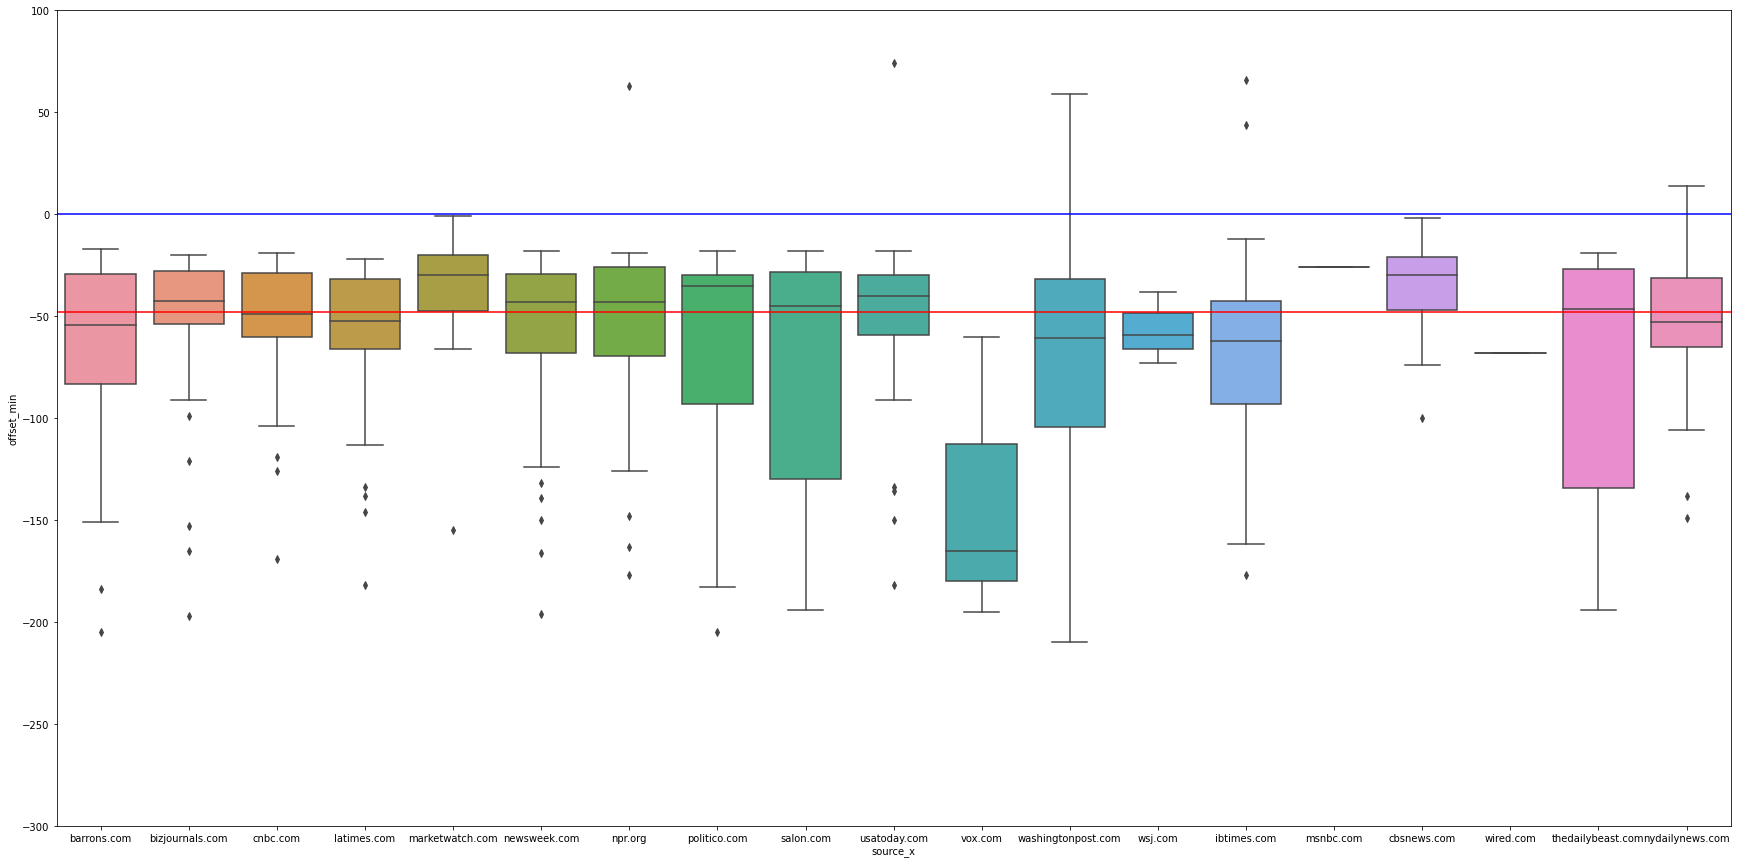

In [11]:
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x="source_x", y="offset_min", data=df_outrm)
ax.axhline(y=0, color='b', linestyle='-')
ax.axhline(y=-48, color='r', linestyle='-')
ax.set_ylim(-300,100)

plt.savefig(os.getcwd() + "/figs/offset_boxplots.png")

In [61]:
round(df_outrm.describe(),2)

,offset_min
count,540.00
mean,-58.73
std,45.97
min,-210.00
25%,-73.00
50%,-45.00
75%,-29.00
max,74.00
